# **Data visualization notebook by Bryan Tjandra**

Visualization bisa dibangun dengan :

- Pandas
- Matplotlib
- Seaborn

# Preprocess Data

## Read data

In [1]:
# gdown -> module to download things from drive
import gdown
import pandas as pd
import numpy as np
import datetime

# Download dataset from drive link

meta_url = 'https://drive.google.com/uc?id='
url = meta_url + '1AKSrGoBNw84oGgejga9GulJUVWIEYTg4'
output = 'melb_data.csv'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1AKSrGoBNw84oGgejga9GulJUVWIEYTg4
To: /content/melb_data.csv
100%|██████████| 2.09M/2.09M [00:00<00:00, 138MB/s]


'melb_data.csv'

In [2]:
# Cara read dataset .csv pake pd.read_csv

filepath = '/content/melb_data.csv'
df = pd.read_csv(filepath)

## Preprocess Data

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.isnull().sum().sort_values(ascending=False).head()

# Kita ingin mengecek apakah ada nilai yang kosong
# 3 kolom teratas nilai yang kosong lumayan banyak , jadi bisa kita drop saja
# Sedangkan kolom car bisa kita fill contoh dengan mean

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
dtype: int64

In [5]:
df = df.drop(['BuildingArea','YearBuilt','CouncilArea'],axis=1) # Drop kolom yang banyak null value
df['Car'] = df['Car'].fillna(df['Car'].mean()) # isi kolom car dengan mean-nya

In [6]:
# Biasanya date itu unique , jadi bisa kita jadikann index , daripada indexnya 0,1,2,....
# Tapi kita coba cek terlebih dahulu apakah datenya unik
df.Date.value_counts().head()

27/05/2017    473
3/06/2017     395
12/08/2017    387
17/06/2017    374
27/11/2016    362
Name: Date, dtype: int64

In [7]:
# Ternyata date nya tidak unik . Maka itu kita bisa bisa groupby supaya datenya unik
# Kita groupby kolom yang berisi angka dengan meannya
# Dan kolom yang berisi string dengan modusnya

df['Date'] = pd.to_datetime(df['Date']) # Ubah kolom Date jadi type datetime

int_col = df.select_dtypes(include='number').columns
int_df = df.groupby('Date')[int_col].agg('mean').astype(int).reset_index()

obj_col = df.select_dtypes(include='object').columns
obj_df = df.groupby('Date')[obj_col].agg(lambda x:x.mode()[0]).reset_index()
# Kita tidak bisa langsung agg(mode) , karena kita ingin mengambil nilai mode yang pertama
# Jadi harus kita sertakan [0]

df = pd.merge(int_df, obj_df).set_index('Date').sort_values(by='Date')

In [8]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


# Pandas visualization

## Plotting

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


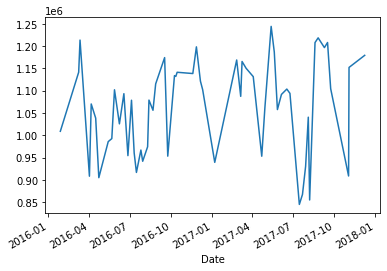

In [ ]:
df['Price'].plot()
# plot() secara defaultd dia visualize lineplot
# Hasilnya akan sama bila syntaxnya df['Price'].plot(kind='line')

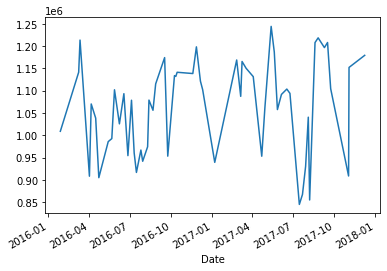

In [ ]:
df['Price'].plot();
# tanda ; untuk remove matplotlib description (biar outputnya rapi)

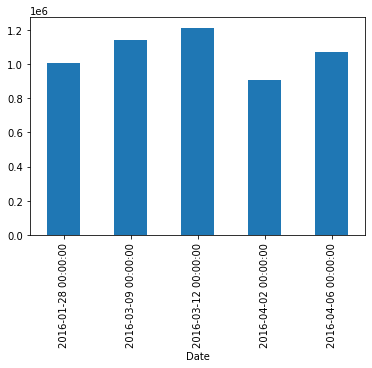

In [ ]:
df.head()['Price'].plot(kind='bar');
# Visualize bar plot

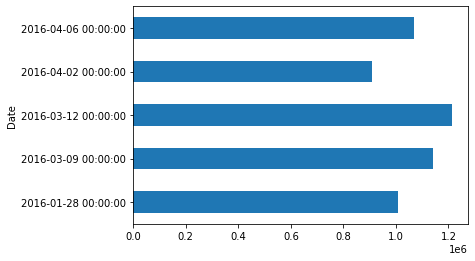

In [ ]:
df.head()['Price'].plot(kind='barh');
# bar horizontal

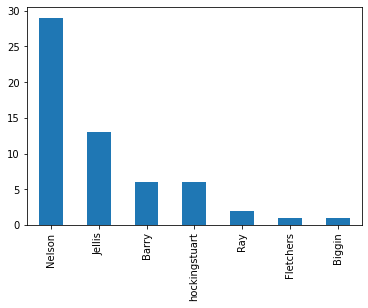

In [ ]:
df['SellerG'].value_counts().plot(kind='bar');
# bar plot jumlah kemunculan masing masing seller

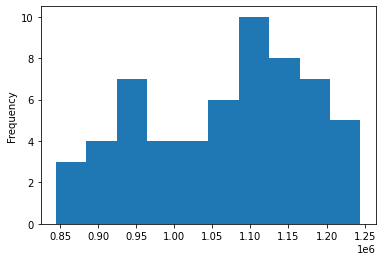

In [ ]:
df['Price'].plot(kind='hist');
# Histogram

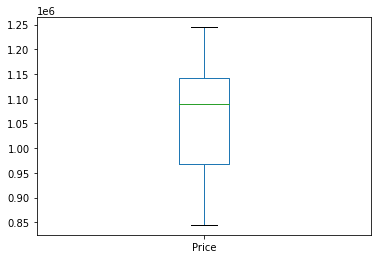

In [ ]:
df['Price'].plot(kind='box');
# Boxplot

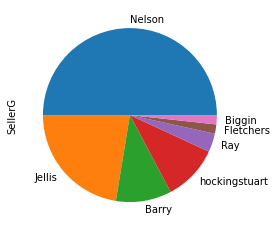

In [ ]:
df['SellerG'].value_counts().plot(kind='pie');
# Pie plot

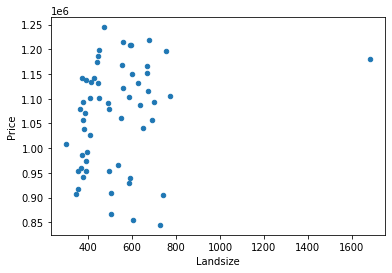

In [ ]:
df.plot(kind='scatter', x='Landsize', y='Price');
# Scatterplot

## Line and Bar Plot with condition

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


In [ ]:
df.index # Check datatype index (ternyata udah datetime)

DatetimeIndex(['2016-01-28', '2016-03-09', '2016-03-12', '2016-04-02',
               '2016-04-06', '2016-04-16', '2016-04-23', '2016-05-14',
               '2016-05-22', '2016-05-28', '2016-06-08', '2016-06-18',
               '2016-06-27', '2016-07-05', '2016-07-11', '2016-07-16',
               '2016-07-26', '2016-07-30', '2016-08-10', '2016-08-13',
               '2016-08-22', '2016-08-28', '2016-09-17', '2016-09-24',
               '2016-10-09', '2016-10-12', '2016-10-15', '2016-11-19',
               '2016-11-27', '2016-12-06', '2016-12-11', '2017-01-07',
               '2017-02-25', '2017-03-06', '2017-03-09', '2017-03-18',
               '2017-04-03', '2017-04-22', '2017-04-29', '2017-05-13',
               '2017-05-20', '2017-05-27', '2017-06-05', '2017-06-17',
               '2017-06-24', '2017-07-15', '2017-07-22', '2017-07-29',
               '2017-08-04', '2017-08-07', '2017-08-19', '2017-08-26',
               '2017-09-09', '2017-09-16', '2017-09-23', '2017-11-02',
      

In [ ]:
df['Year'] = df.index.year # Ambil year dari index
df['Month'] = df.index.month # Ambil month dari index

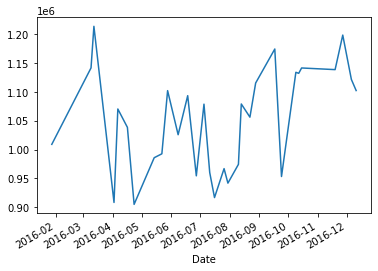

In [ ]:
df[df['Year']==2016]['Price'].plot();
# Lineplot for price in 2016

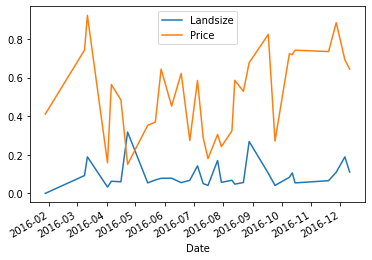

In [ ]:
int_df = df.select_dtypes(include='number')
df_norm = (int_df-int_df.min())/(int_df.max()-int_df.min())
df_norm[df['Year']==2016][['Landsize','Price']].plot();
# plot landsize dan price yang sudah di normalisasi

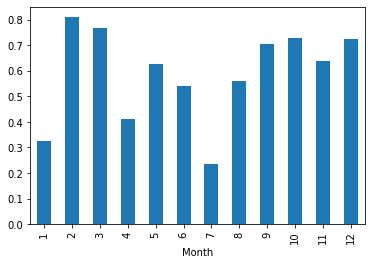

In [ ]:
df_norm.groupby(df['Month'])['Price'].mean().plot(kind='bar');
# Bar plot price per month

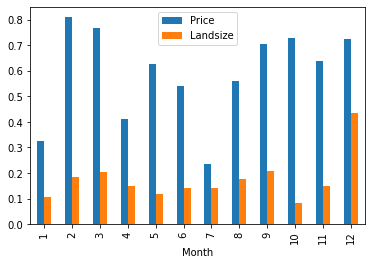

In [ ]:
df_norm.groupby(df['Month'])[['Price','Landsize']].mean().plot(kind='bar');
# Bar plot price and landsize per month

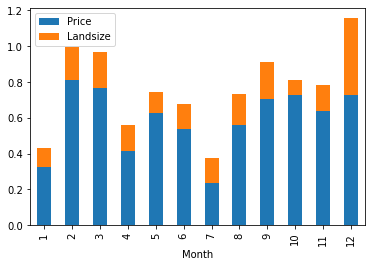

In [ ]:
df_norm.groupby(df['Month'])[['Price','Landsize']].mean().plot(kind='bar', stacked=True);
# Bar plot price and landsize per month (stacked)

## Other Plot with condition

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname,Year,Month
Date,,,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan,2016,1
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan,2016,3
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan,2016,3
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan,2016,4
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan,2016,4


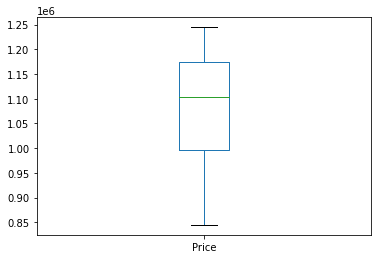

In [ ]:
df[df['Year']==2017]['Price'].plot(kind='box')

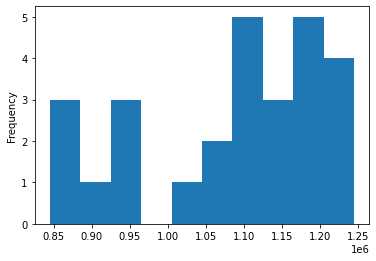

In [ ]:
df[df['Year']==2017]['Price'].plot(kind='hist', bins=10);

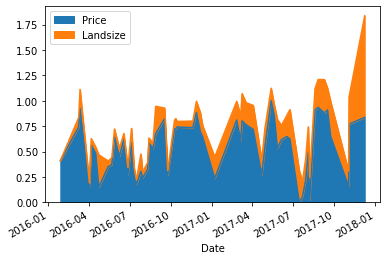

In [ ]:
int_df = df.select_dtypes(include='number')
df_norm = (int_df-int_df.min())/(int_df.max()-int_df.min())
df_norm[['Price','Landsize']].plot(kind='area');

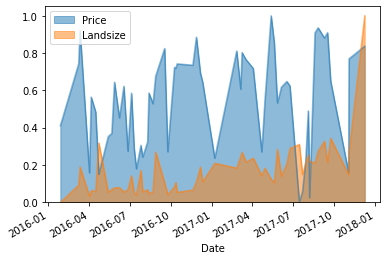

In [ ]:
df_norm[['Price','Landsize']].plot(kind='area', stacked =False);

In [ ]:
df.index.month_name()

Index(['January', 'March', 'March', 'April', 'April', 'April', 'April', 'May',
       'May', 'May', 'June', 'June', 'June', 'July', 'July', 'July', 'July',
       'July', 'August', 'August', 'August', 'August', 'September',
       'September', 'October', 'October', 'October', 'November', 'November',
       'December', 'December', 'January', 'February', 'March', 'March',
       'March', 'April', 'April', 'April', 'May', 'May', 'May', 'June', 'June',
       'June', 'July', 'July', 'July', 'August', 'August', 'August', 'August',
       'September', 'September', 'September', 'November', 'November',
       'December'],
      dtype='object', name='Date')

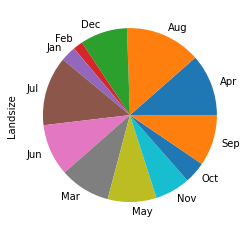

In [ ]:
df['Name'] = df.index.month_name().str[:3]
df.groupby('Name')['Landsize'].sum().plot(kind='pie');

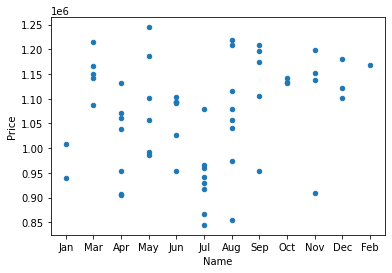

In [ ]:
df.plot(kind='scatter', x='Name', y='Price')

# Matplotlib

## Import Matplotlib

In [11]:
import matplotlib.pyplot as plt

# matplotlib.pyplot -> module untuk data visualization
# plt common name untuk modul ini

## Anatomy

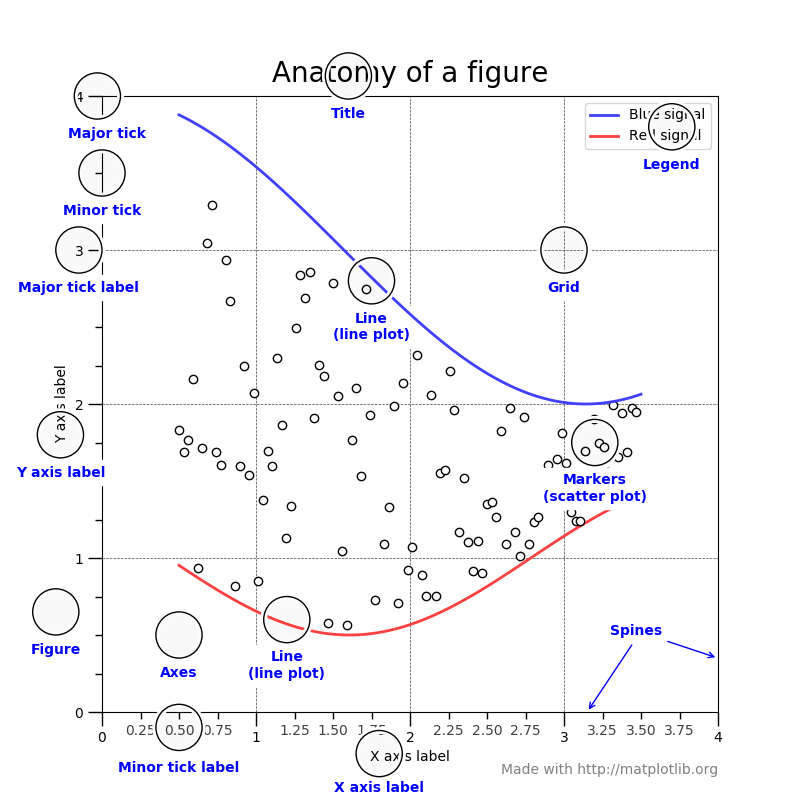

Figure -> Keseluruhan grafik

Axes -> Bagian dari figure / subplot

Axis label -> label untuk sumbu x/y

Ticks -> Penanda garis di axis x/y

Tick label -> Tulisan dari tick

Legend -> Penjelasan label warna line

Grid -> Untuk melihat tick yang sejajar

Text -> Info text di grafik

Annotation -> Penunjuk text




## Plotting

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


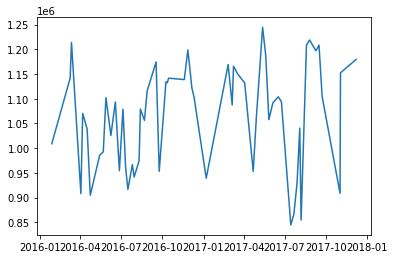

In [ ]:
plt.plot('Price', data = df)
plt.show()

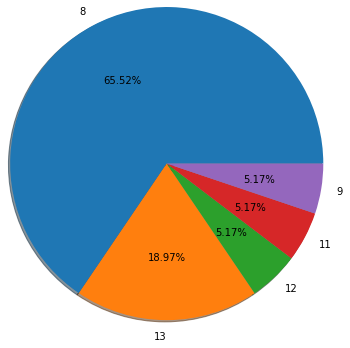

In [149]:
count_distance = df.Distance.value_counts()
plt.pie(count_distance, labels= count_distance.index, autopct='%.2f%%', shadow=True, radius = 1.8)
plt.show()

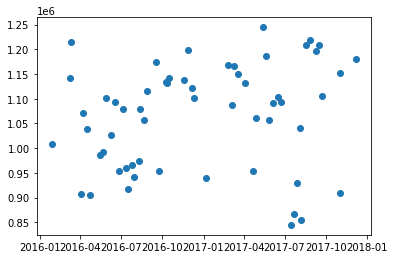

In [ ]:
plt.scatter(df.index , df.Price);

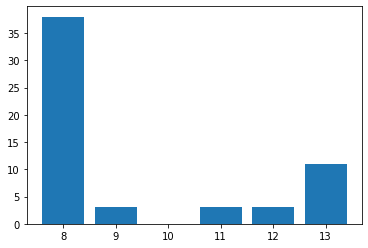

In [ ]:
count_distance = df.Distance.value_counts()
plt.bar(count_distance.index , count_distance);

## Figure

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


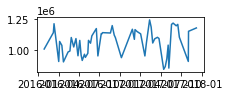

In [ ]:
fig = plt.figure(figsize = (3,1))
plt.plot('Price', data=df)
plt.show()

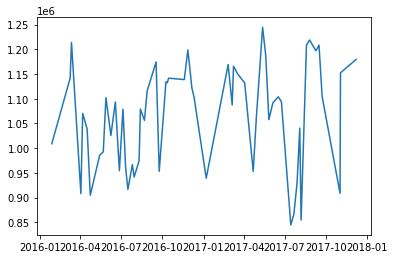

In [ ]:
fig = plt.figure()
plt.plot('Price', data=df)
plt.show()

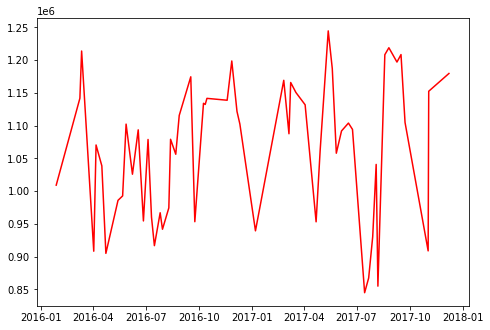

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]) # left, bottom, width, height (range 0-1)
axes.plot('Price', data=df, color='r');

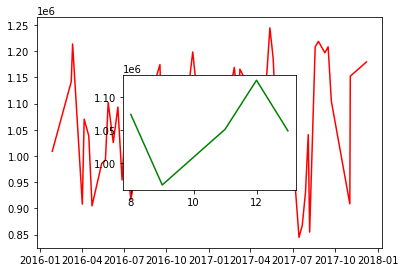

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.3, 0.3, 0.4, 0.4]) # inner axes

# main figure
axes1.plot(df['Price'], 'r')

# insert
axes2.plot(df.groupby('Distance')['Price'].mean(), 'g');

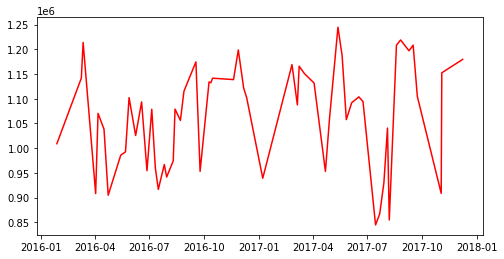

In [ ]:
fig, axes = plt.subplots(figsize=(8,4))

axes.plot(df['Price'], 'r');

In [ ]:
fig.savefig("MyFigure.png")

## Axes

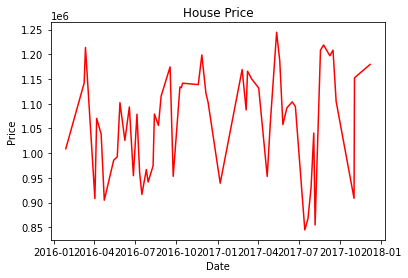

In [ ]:
fig, axes = plt.subplots()

axes.plot('Price', data=df, color='r')

axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.set_title('House Price');

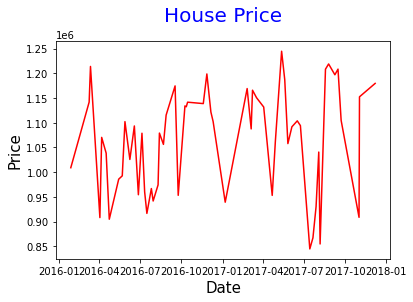

In [ ]:
fig, axes = plt.subplots()

axes.plot('Price', data=df, color='r')

axes.set_xlabel('Date', fontsize=15)
axes.set_ylabel('Price', fontsize=15)
axes.set_title('House Price', loc='center', fontsize=20, color='b', pad=20);

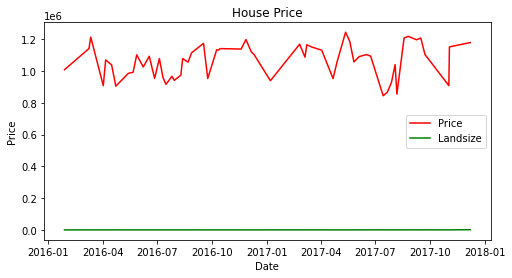

In [ ]:
fig, axes = plt.subplots(figsize=(8,4))

axes.plot(df['Price'], 'r', label='Price')
axes.plot(df['Landsize'], 'g', label='Landsize')

axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.set_title('House Price')
axes.legend();

In [ ]:
axes.legend(loc=0) # let matplotlib decide the optimal location
axes.legend(loc=1) # upper right corner
axes.legend(loc=2) # upper left corner
axes.legend(loc=3) # lower left corner
axes.legend(loc=4); # lower right corner
# Many more

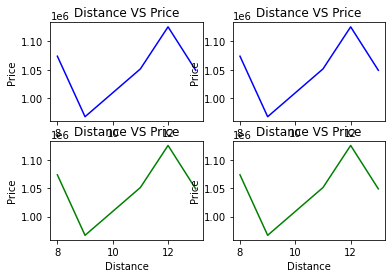

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
color = ['b', 'g']
for row, col in zip(axes,color):
  for ax in row :
    ax.plot(df.groupby('Distance')['Price'].mean(), col)
    ax.set_xlabel('Distance')
    ax.set_ylabel('Price')
    ax.set_title('Distance VS Price');

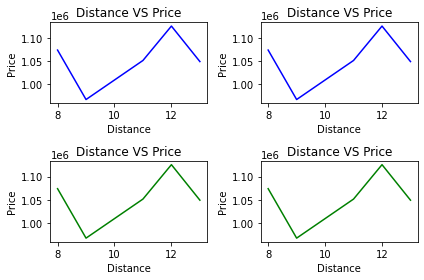

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
color = ['b', 'g']
for row, col in zip(axes,color):
  for ax in row :
    ax.plot(df.groupby('Distance')['Price'].mean(), col)
    ax.set_xlabel('Distance')
    ax.set_ylabel('Price')
    ax.set_title('Distance VS Price');
fig.tight_layout()

## Plotting Parameter

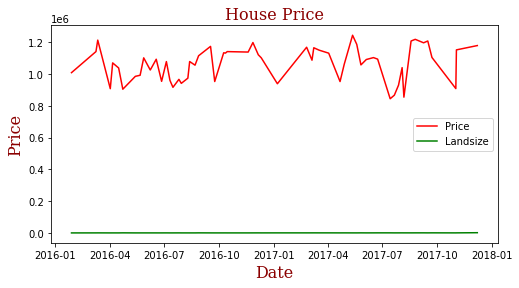

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, axes = plt.subplots(figsize=(8,4))

axes.plot(df['Price'], 'r', label='Price')
axes.plot(df['Landsize'], 'g', label='Landsize')

axes.set_xlabel('Date',fontdict = font)
axes.set_ylabel('Price',fontdict = font)
axes.set_title('House Price',fontdict = font)
axes.legend(loc=0);

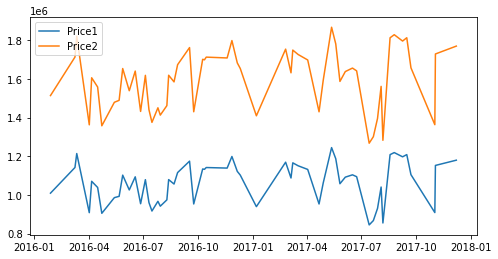

In [ ]:
fig, axes = plt.subplots(figsize=(8,4))
axes.plot(df.index , df['Price'] , df['Price']*1.5)
axes.legend(['Price1','Price2']);

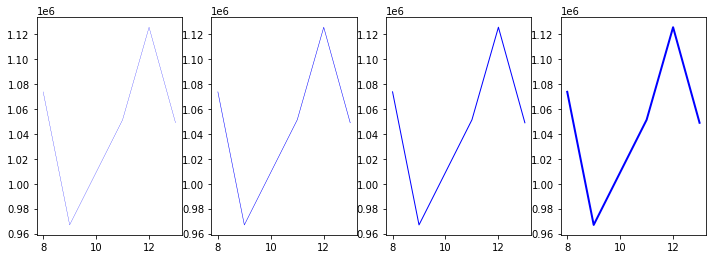

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
dist_price = df.groupby('Distance')['Price'].mean()
axes[0].plot(dist_price, color="blue", linewidth=0.25)
axes[1].plot(dist_price, color="blue", linewidth=0.50)
axes[2].plot(dist_price, color="blue", linewidth=1.00)
axes[3].plot(dist_price, color="blue", linewidth=2.00);

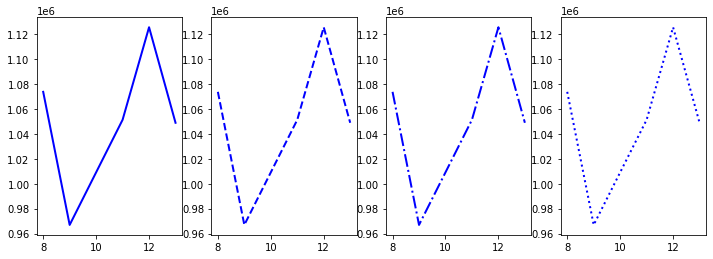

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
dist_price = df.groupby('Distance')['Price'].mean()
axes[0].plot(dist_price, color="blue", lw=2, linestyle='-')
axes[1].plot(dist_price, color="blue", lw=2, linestyle='--')
axes[2].plot(dist_price, color="blue", lw=2, linestyle='-.')
axes[3].plot(dist_price, color="blue", lw=2, linestyle=':');

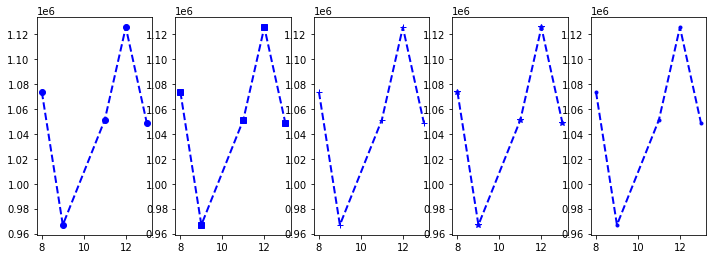

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
dist_price = df.groupby('Distance')['Price'].mean()
axes[0].plot(dist_price, color="blue", lw=2, ls='--', marker='o')
axes[1].plot(dist_price, color="blue", lw=2, ls='--', marker='s')
axes[2].plot(dist_price, color="blue", lw=2, ls='--', marker='+')
axes[3].plot(dist_price, color="blue", lw=2, ls='--', marker='*')
axes[4].plot(dist_price, color="blue", lw=2, ls='--', marker='.');

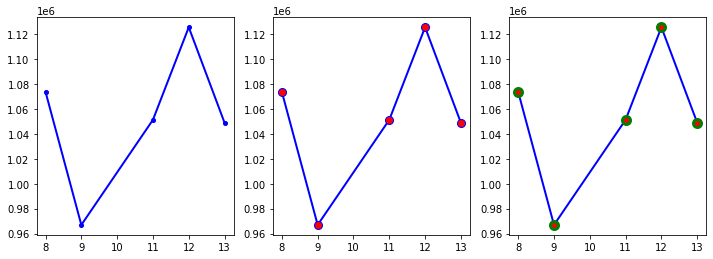

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
dist_price = df.groupby('Distance')['Price'].mean()
axes[0].plot(dist_price, color="blue", lw=2, ls='-', marker='o', markersize = 4)
axes[1].plot(dist_price, color="blue", lw=2, ls='-', marker='o', markersize = 8, markerfacecolor='r')
axes[2].plot(dist_price, color="blue", lw=2, ls='-', marker='o', markersize = 8, markerfacecolor='r', markeredgewidth=3, markeredgecolor='g');

## Ticks & Limit

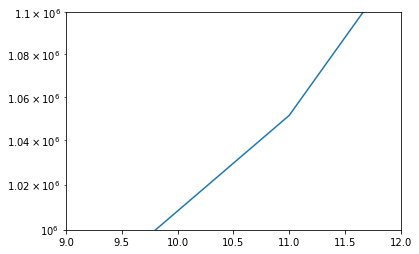

In [ ]:
fig, axes = plt.subplots()
dist_price = df.groupby('Distance')['Price'].mean()
axes.plot(dist_price)
axes.set_yscale('log')
axes.set_ylim([1e6,1.1e6])
axes.set_xlim([9, 12]);

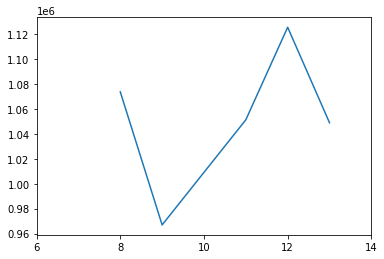

In [ ]:
fig, axes = plt.subplots()
dist_price = df.groupby('Distance')['Price'].mean()
axes.plot(dist_price)
axes.set_xticks([6,8,10,12,14])

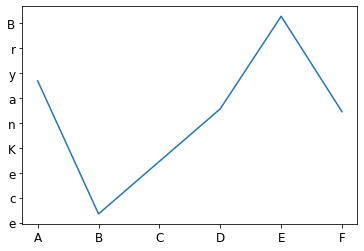

In [ ]:
fig, axes = plt.subplots()
dist_price = df.groupby('Distance')['Price'].mean()
axes.plot(dist_price)
axes.set_xticks([i for i in range(8,14)]);
axes.set_xticklabels([chr(i) for i in range(65,71)], fontsize=12)
axes.set_yticklabels(list('BryanKece.')[::-1], fontsize=12);

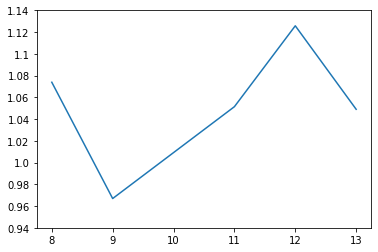

In [ ]:
fig, axes = plt.subplots()
dist_price = df.groupby('Distance')['Price'].mean()
axes.plot(dist_price)

labels , location = plt.yticks()
plt.yticks(labels,labels/1e6);

## Grid & Text

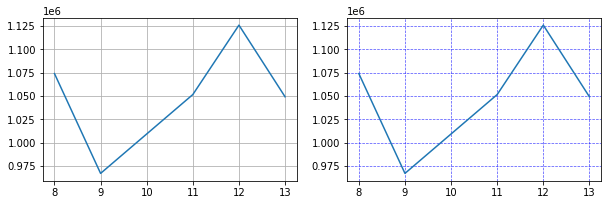

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
dist_price = df.groupby('Distance')['Price'].mean()

axes[0].plot(dist_price)
axes[0].grid()

axes[1].plot(dist_price)
axes[1].grid(color='b', alpha=0.7, linestyle='dashed', linewidth=0.7)

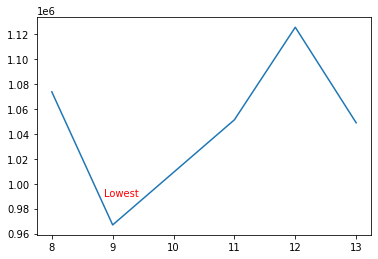

In [ ]:
fig, axes = plt.subplots()
dist_price = df.groupby('Distance')['Price'].mean()
axes.plot(dist_price)

axes.text(8.85, 0.99e6, "Lowest", fontsize=10, color="r");

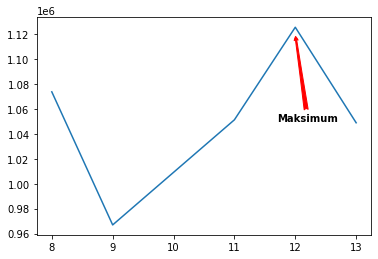

In [132]:
fig, axes = plt.subplots()
dist_price = df.groupby('Distance')['Price'].mean()
axes.plot(dist_price)
plt.annotate('Maksimum', xy=(12,1.12e6), xytext=(11.7,1.05e6), weight='bold', 
              arrowprops= dict(arrowstyle='fancy', color='r', connectionstyle='arc3'));
# arrowstyle : -> , -|> , <-> , -[ , simple , wedge
# connectionstyle : angle , angle3 , bar , arc , arc3

## Example

In [9]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


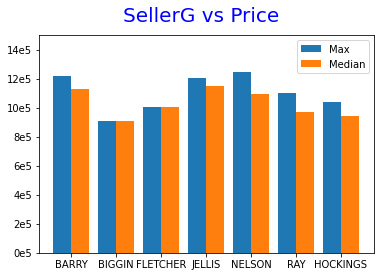

In [108]:
seller_price = df.groupby('SellerG')['Price'].agg(['max','median']).reset_index()
seller_price['SellerG'] = seller_price['SellerG'].str[:8].str.upper()

width = 0.4
seller_nunique = seller_price.SellerG.nunique()
x = plt.bar(np.arange(seller_nunique), 'max', width, data = seller_price, label='Max')
y = plt.bar(np.arange(seller_nunique) + width, 'median', width, data = seller_price, label='Median')
plt.xticks(np.arange(seller_nunique) + width/2 ,seller_price.SellerG.unique())

labels, _ = plt.yticks()
new_label = map(lambda x: str(x)+'e5', (labels/1e5).astype(int))
plt.yticks(labels, new_label)

plt.suptitle('SellerG vs Price',fontsize=20, color='b')
plt.ylim((0,15e5))
plt.xlim(xmin=-0.5)
plt.legend();
#  If we want to use 1 axes , we can directly use plt attribute , rather than ax attribute

# Seaborn

## Import seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn -> tools for visualize

## Line Plot

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
Date,,,,,,,,,,,,,,,,,
2016-01-28,2,1009000,11,3127,2,1,2,299,-37,145,5457,Surrey Hills,1/10 Florence Rd,h,S,Fletchers,Southern Metropolitan
2016-03-09,2,1141657,8,3098,2,1,1,427,-37,144,6861,Richmond,1 Gowanbrae Dr,h,S,Nelson,Southern Metropolitan
2016-03-12,2,1213757,8,3105,2,1,1,561,-37,144,7341,Balwyn,1 Buxton St,h,S,Nelson,Southern Metropolitan
2016-04-02,2,908182,9,3091,2,1,1,344,-37,144,5936,Burwood,1/123 Blyth St,h,S,Biggin,Western Metropolitan
2016-04-06,2,1070334,8,3102,2,1,1,386,-37,144,7126,Bentleigh East,1 Konrad St,h,S,Jellis,Southern Metropolitan


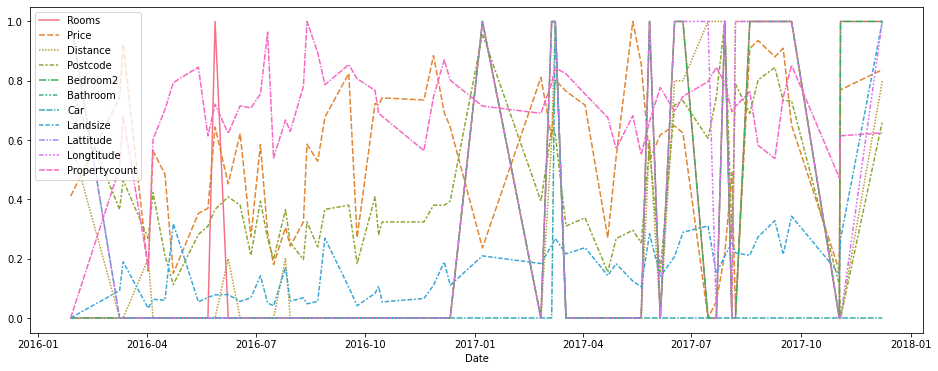

In [ ]:
plt.figure(figsize=(16,6))
int_df = df.select_dtypes(include='number')
df_norm = (int_df-int_df.min())/(int_df.max()-int_df.min())
sns.lineplot(data=df_norm);

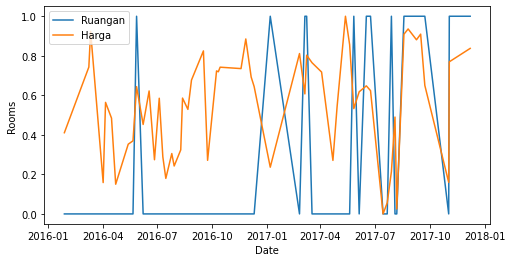

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df_norm['Rooms'], label='Ruangan');
sns.lineplot(data=df_norm['Price'], label='Harga');

## Bar plot

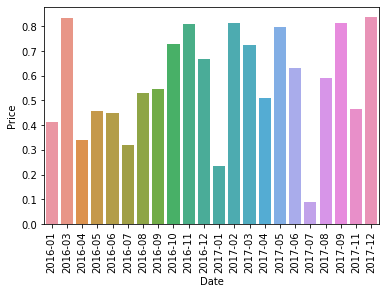

In [ ]:
df_norm = df_norm.reset_index()
df_norm['Date'] = df_norm['Date'].astype('str').apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m'))
norm_group_price = df_norm.groupby('Date')['Price'].mean().reset_index()

sns.barplot(x='Date', y='Price', data=norm_group_price);
plt.xticks(rotation=90);

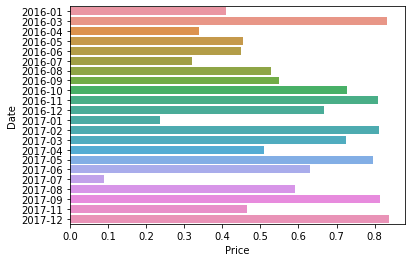

In [ ]:
sns.barplot(x='Price', y='Date', data=norm_group_price);

## Heatmap

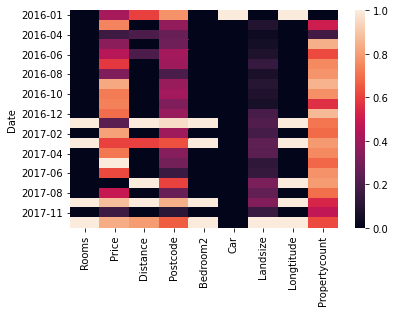

In [ ]:
df_norm = df_norm.drop_duplicates(keep='first', subset='Date').set_index('Date')
df_norm = df_norm.drop(['Lattitude', 'Bathroom'], axis=1)
sns.heatmap(data=df_norm);

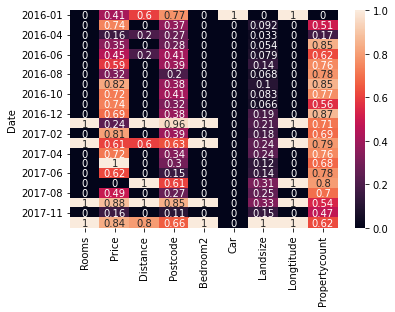

In [ ]:
sns.heatmap(data=df_norm, annot=True);

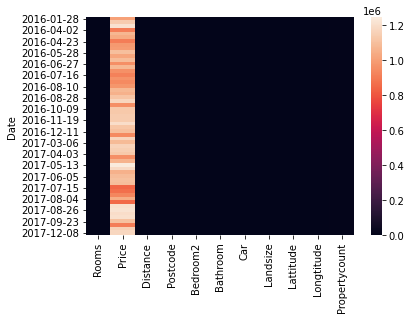

In [ ]:
int_df.index = int_df.index.astype('str')
sns.heatmap(data=int_df);

## Scatter plot

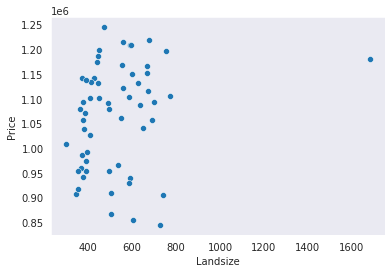

In [ ]:
sns.set_style('dark')
sns.scatterplot(x='Landsize', y='Price', data=df);
# "darkgrid"
# "whitegrid"
# "dark"
# "white"

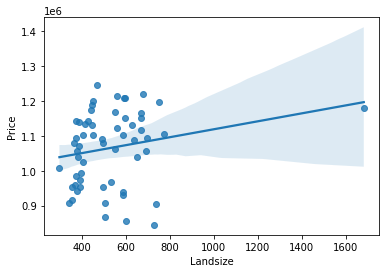

In [ ]:
sns.regplot(x='Landsize', y='Price', data=df);

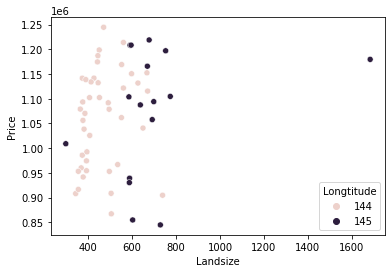

In [ ]:
sns.scatterplot(x='Landsize', y='Price', data=df, hue='Longtitude');

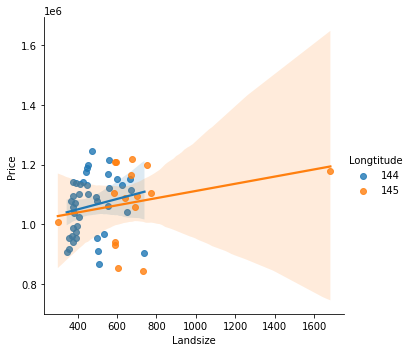

In [ ]:
sns.lmplot(x='Landsize', y='Price', data=df, hue='Longtitude');

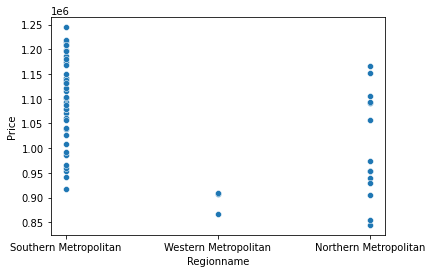

In [ ]:
sns.scatterplot(x='Regionname', y='Price', data=df);

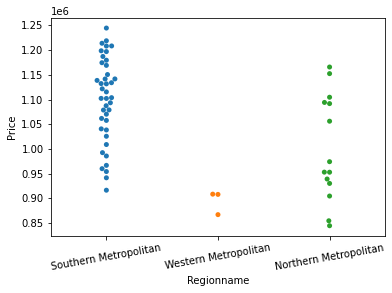

In [ ]:
plt.xticks(rotation=10)
sns.swarmplot(x='Regionname', y='Price', data=df);

## Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


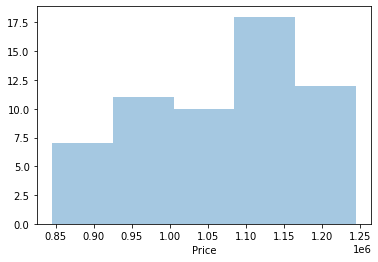

In [ ]:
sns.distplot(df['Price'], bins=5, kde=False);

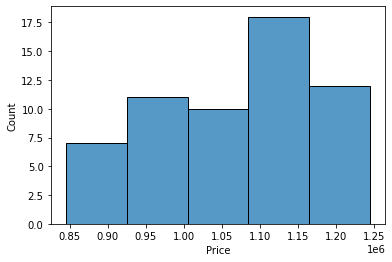

In [ ]:
sns.histplot(df['Price'], bins=5, kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


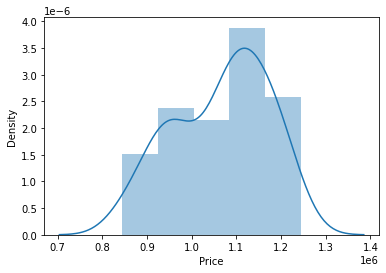

In [ ]:
sns.distplot(df['Price'], bins=5, kde=True);

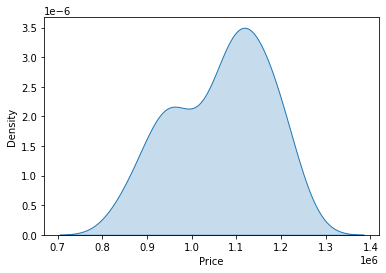

In [ ]:
sns.kdeplot(df['Price'], shade=True);

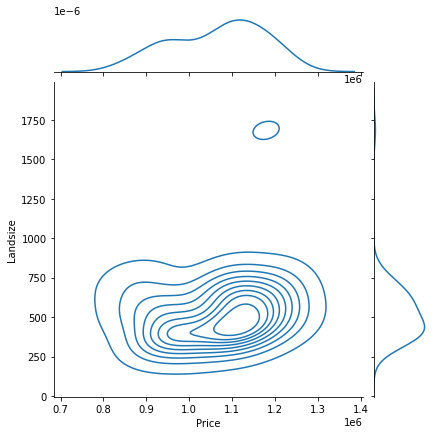

In [ ]:
sns.jointplot(x=df['Price'], y=df['Landsize'], kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


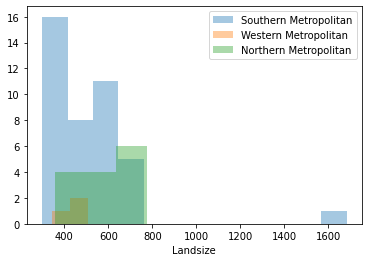

In [ ]:
sns.distplot(df[df['Regionname']=='Southern Metropolitan']['Landsize'], kde=False, label='Southern Metropolitan');
sns.distplot(df[df['Regionname']=='Western Metropolitan']['Landsize'], kde=False, label='Western Metropolitan');
sns.distplot(df[df['Regionname']=='Northern Metropolitan']['Landsize'], kde=False, label='Northern Metropolitan');
plt.legend();

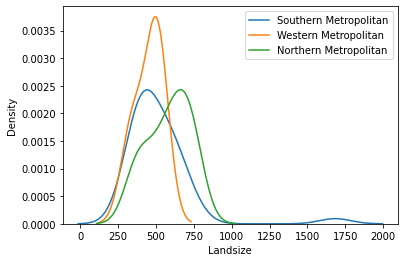

In [ ]:
sns.kdeplot(df[df['Regionname']=='Southern Metropolitan']['Landsize'], label='Southern Metropolitan');
sns.kdeplot(df[df['Regionname']=='Western Metropolitan']['Landsize'], label='Western Metropolitan');
sns.kdeplot(df[df['Regionname']=='Northern Metropolitan']['Landsize'], label='Northern Metropolitan');
plt.legend();

## Summary

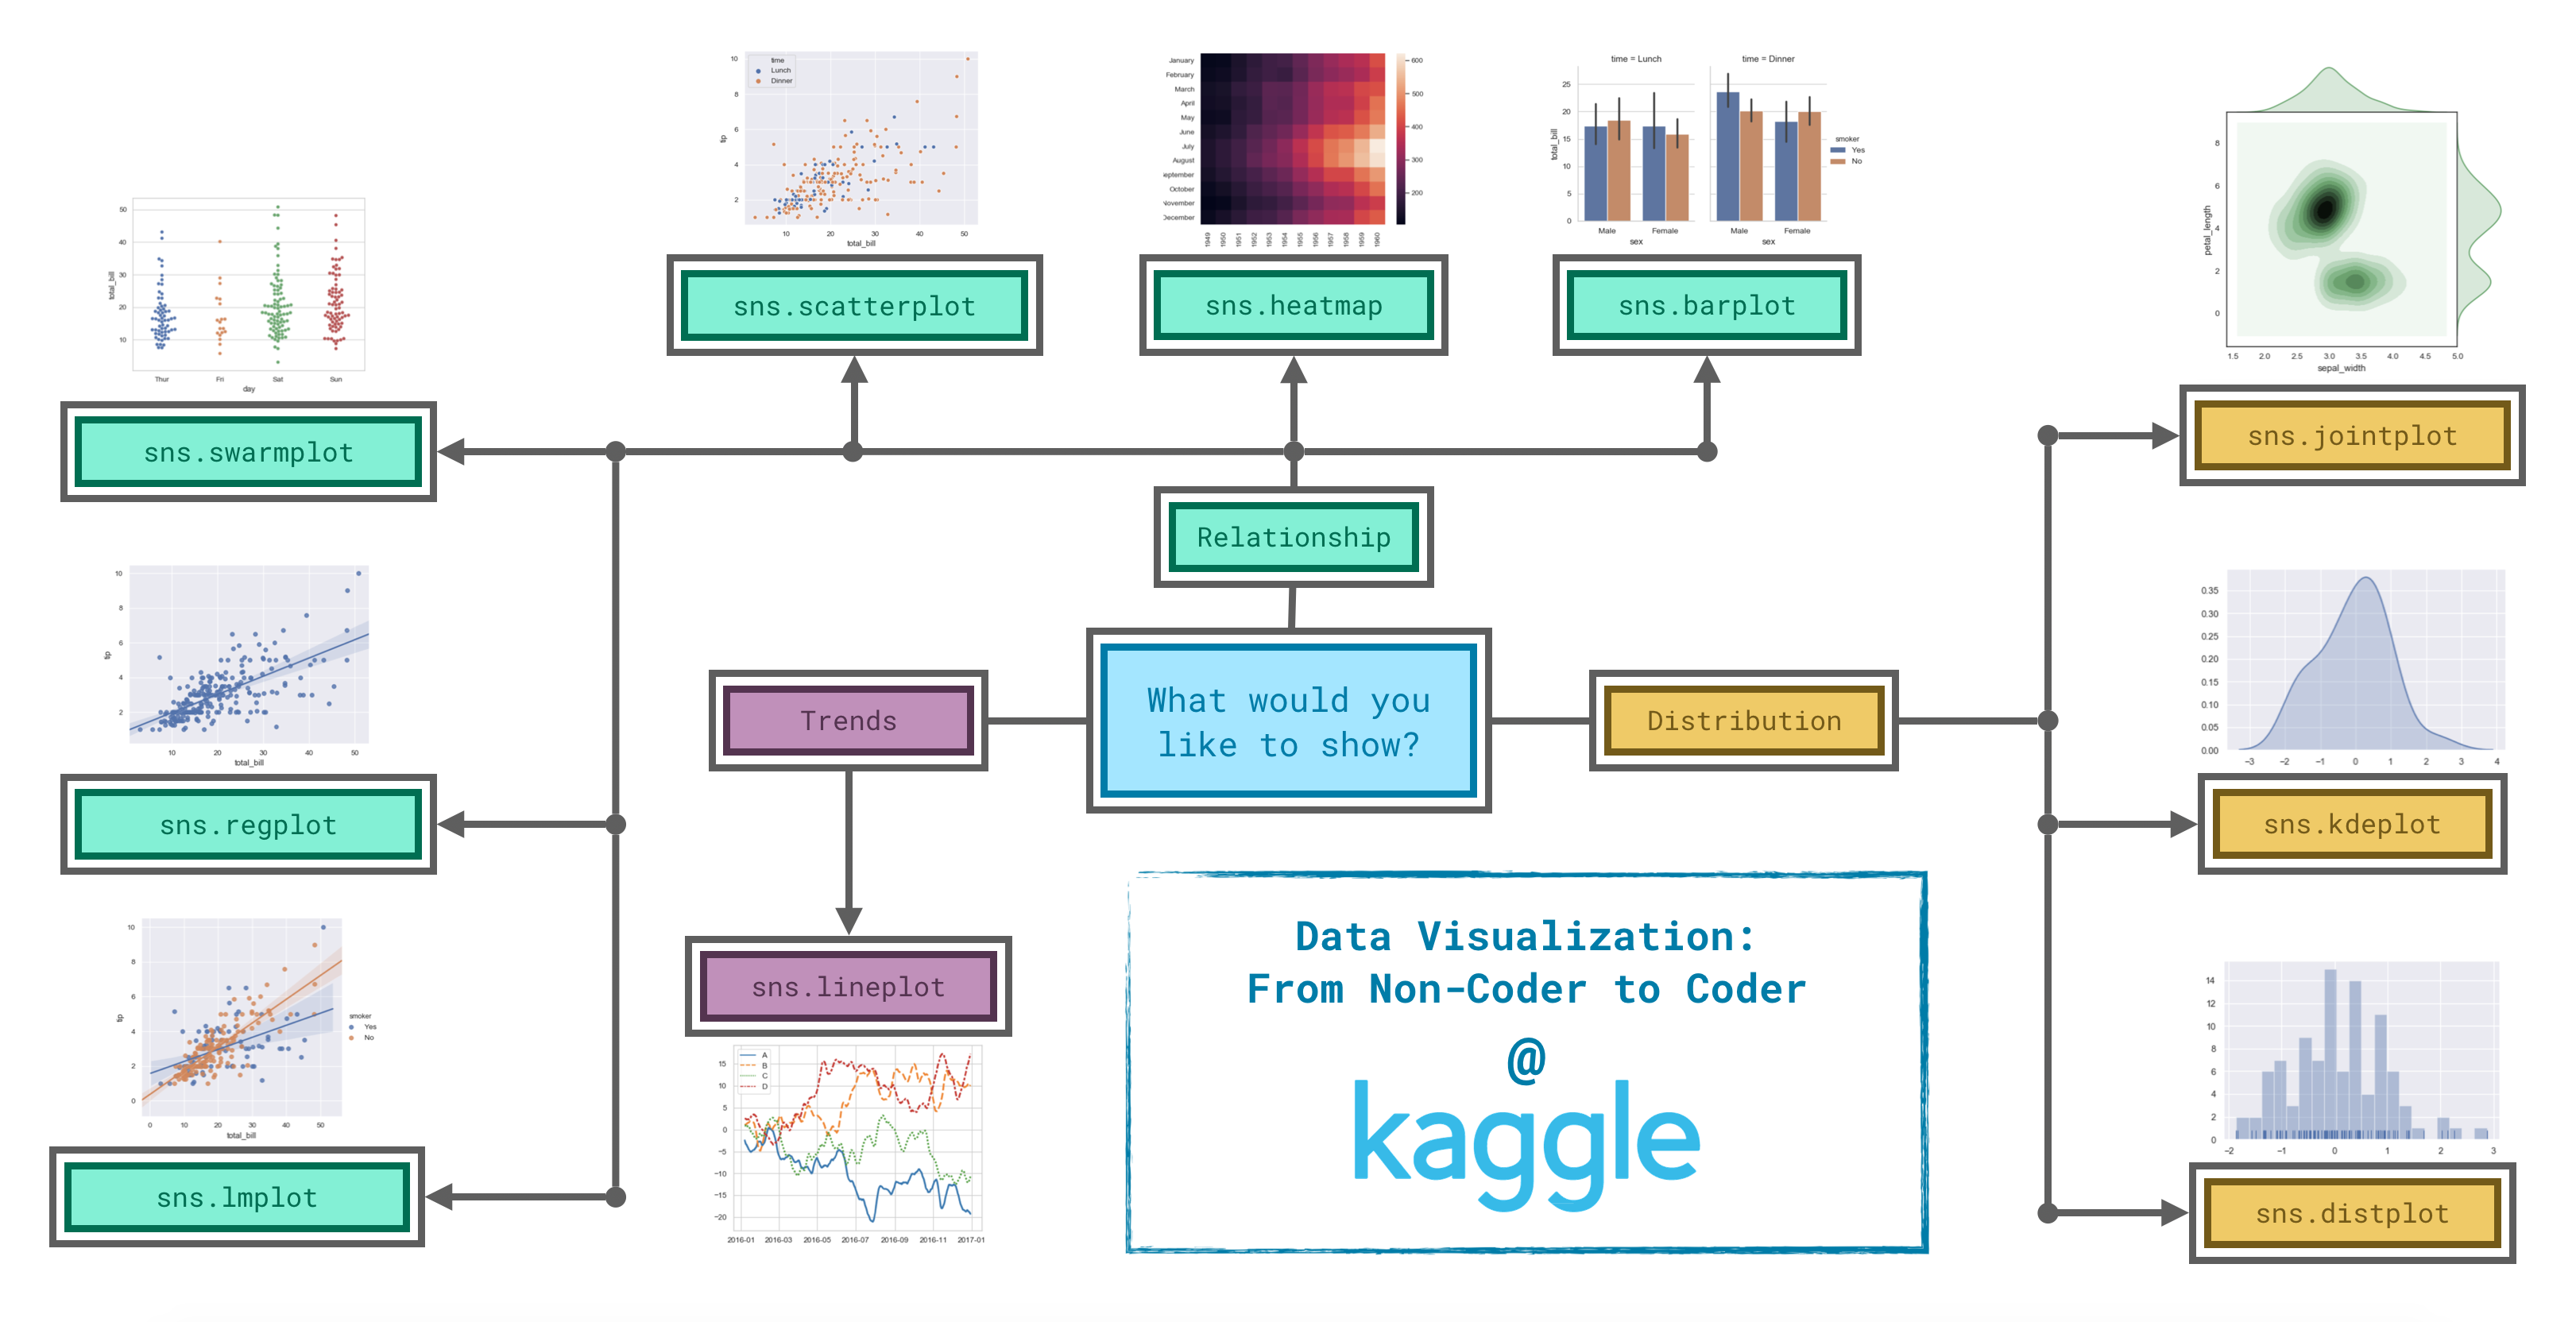

# References

https://www.southampton.ac.uk/~feeg1001/notebooks/Matplotlib.html

https://www.kaggle.com/learn/data-visualization